In [3]:
!mkdir -p /content/catsdogs


In [9]:
from google.colab import files
uploaded = files.upload()


Saving dataset.zip to dataset.zip


In [10]:
import zipfile

zip_path = "/content/dataset.zip"
extract_to = "/content/"

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_to)

print("Dataset extracted!")


Dataset extracted!


In [11]:
train_dir = "/content/dataset/train"
test_dir = "/content/dataset/test"


In [14]:
!ls /content/dataset/train


cat.612.jpg  cat.708.jpg  cat.804.jpg	 dog.12280.jpg	dog.12400.jpg
cat.613.jpg  cat.709.jpg  cat.805.jpg	 dog.12281.jpg	dog.12401.jpg
cat.614.jpg  cat.710.jpg  cat.806.jpg	 dog.12282.jpg	dog.12402.jpg
cat.615.jpg  cat.711.jpg  cat.807.jpg	 dog.12283.jpg	dog.12403.jpg
cat.616.jpg  cat.712.jpg  cat.808.jpg	 dog.12284.jpg	dog.12404.jpg
cat.617.jpg  cat.713.jpg  cat.809.jpg	 dog.12285.jpg	dog.12405.jpg
cat.618.jpg  cat.714.jpg  cat.810.jpg	 dog.12286.jpg	dog.12406.jpg
cat.619.jpg  cat.715.jpg  cat.811.jpg	 dog.12287.jpg	dog.12407.jpg
cat.620.jpg  cat.716.jpg  cat.812.jpg	 dog.12288.jpg	dog.12408.jpg
cat.621.jpg  cat.717.jpg  cat.813.jpg	 dog.12289.jpg	dog.12409.jpg
cat.622.jpg  cat.718.jpg  cat.814.jpg	 dog.12290.jpg	dog.12410.jpg
cat.623.jpg  cat.719.jpg  cat.815.jpg	 dog.12291.jpg	dog.12411.jpg
cat.624.jpg  cat.720.jpg  cat.816.jpg	 dog.12316.jpg	dog.12412.jpg
cat.625.jpg  cat.721.jpg  cat.817.jpg	 dog.12317.jpg	dog.12413.jpg
cat.626.jpg  cat.722.jpg  cat.818.jpg	 dog.12318.jpg	dog.12414

In [22]:
train_dir = "/content/dataset/train"
test_dir  = "/content/dataset/test"

train_cats = os.path.join(train_dir, "cats")
train_dogs = os.path.join(train_dir, "dogs")

test_cats  = os.path.join(test_dir, "cats")
test_dogs  = os.path.join(test_dir, "dogs")


In [25]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random

IMG_SIZE = 64
data = []
labels = []

train_dir = "/content/dataset/train"   # YOUR FOLDER

# Load images
for img_name in os.listdir(train_dir):
    if img_name.startswith("cat"):
        label = 0
    elif img_name.startswith("dog"):
        label = 1
    else:
        continue  # skip files like 10.jpg, 20.jpg, etc.

    img_path = os.path.join(train_dir, img_name)
    img = cv2.imread(img_path)

    if img is None:
        continue

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    data.append(img.flatten())
    labels.append(label)

data = np.array(data)
labels = np.array(labels)

print("Loaded:", data.shape, labels.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

# Train SVM
svm = SVC(kernel="linear")
print("Training SVM...")
svm.fit(X_train, y_train)

# Accuracy
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Loaded: (480, 12288) (480,)
Training SVM...
Accuracy: 0.5208333333333334


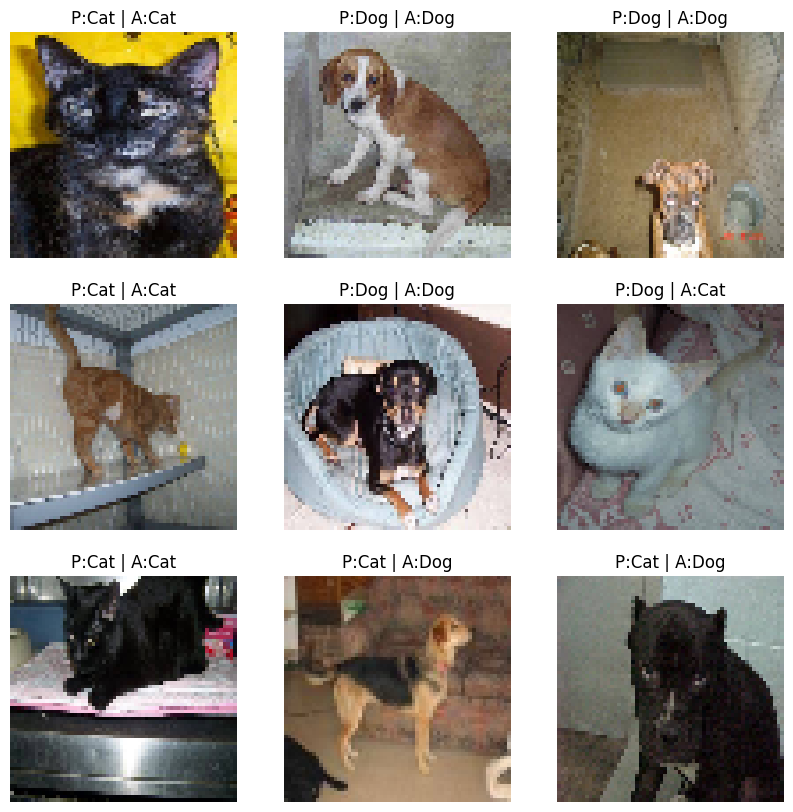

In [27]:
def visualize_predictions(num_samples=9):
    plt.figure(figsize=(10, 10))
    indices = random.sample(range(len(X_test)), num_samples)

    for i, idx in enumerate(indices):
        img = X_test[idx].reshape(IMG_SIZE, IMG_SIZE, 3)
        pred = svm.predict([X_test[idx]])[0]
        actual = y_test[idx]

        pred_label = "Dog" if pred == 1 else "Cat"
        actual_label = "Dog" if actual == 1 else "Cat"

        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"P:{pred_label} | A:{actual_label}")

    plt.show()

visualize_predictions()
